In [17]:
pip install apyori

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
df.isnull().sum().sort_values(ascending = False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [ ]:
df['date'] = pd.to_datetime(df['Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  object        
 2   itemDescription  38765 non-null  object        
 3   date             38765 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


<ipython-input-7-b4f584225f8a>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['Date'])


In [ ]:
df.head()

,Member_number,Date,itemDescription,date
0,1808,21-07-2015,tropical fruit,2015-07-21
1,2552,05-01-2015,whole milk,2015-05-01
2,2300,19-09-2015,pip fruit,2015-09-19
3,1187,12-12-2015,other vegetables,2015-12-12
4,3037,01-02-2015,whole milk,2015-01-02


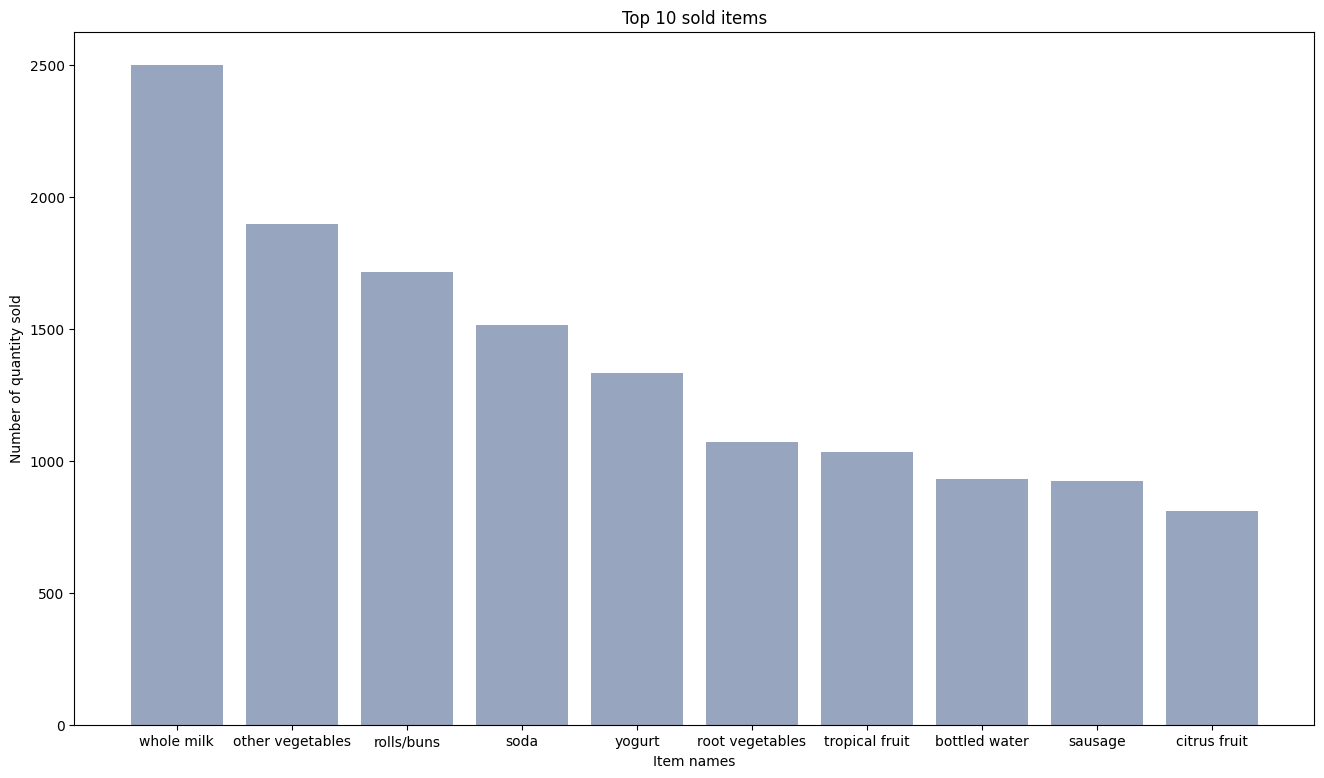

In [ ]:
item_distr = df.groupby(by='itemDescription').size().reset_index(name='Frequency').sort_values(by='Frequency', ascending=False).head(10)
bars = item_distr["itemDescription"]
height = item_distr["Frequency"]
x_pos = np.arange(len(bars))

plt.figure(figsize=(16,9))
plt.bar(x_pos,height,color=(0.2,0.3,0.5,0.5))
plt.title("Top 10 sold items")
plt.xlabel("Item names")
plt.ylabel("Number of quantity sold")
plt.xticks(x_pos,bars)
plt.show()

In [ ]:
df_date = df.set_index(['date'])
df_date

,Member_number,Date,itemDescription
date,,,
2015-07-21,1808,21-07-2015,tropical fruit
2015-05-01,2552,05-01-2015,whole milk
2015-09-19,2300,19-09-2015,pip fruit
2015-12-12,1187,12-12-2015,other vegetables
2015-01-02,3037,01-02-2015,whole milk
...,...,...,...
2014-08-10,4471,08-10-2014,sliced cheese
2014-02-23,2022,23-02-2014,candy
2014-04-16,1097,16-04-2014,cake bar


[Text(0.5, 0, 'date'), Text(0, 0.5, 'numeber of item sold')]

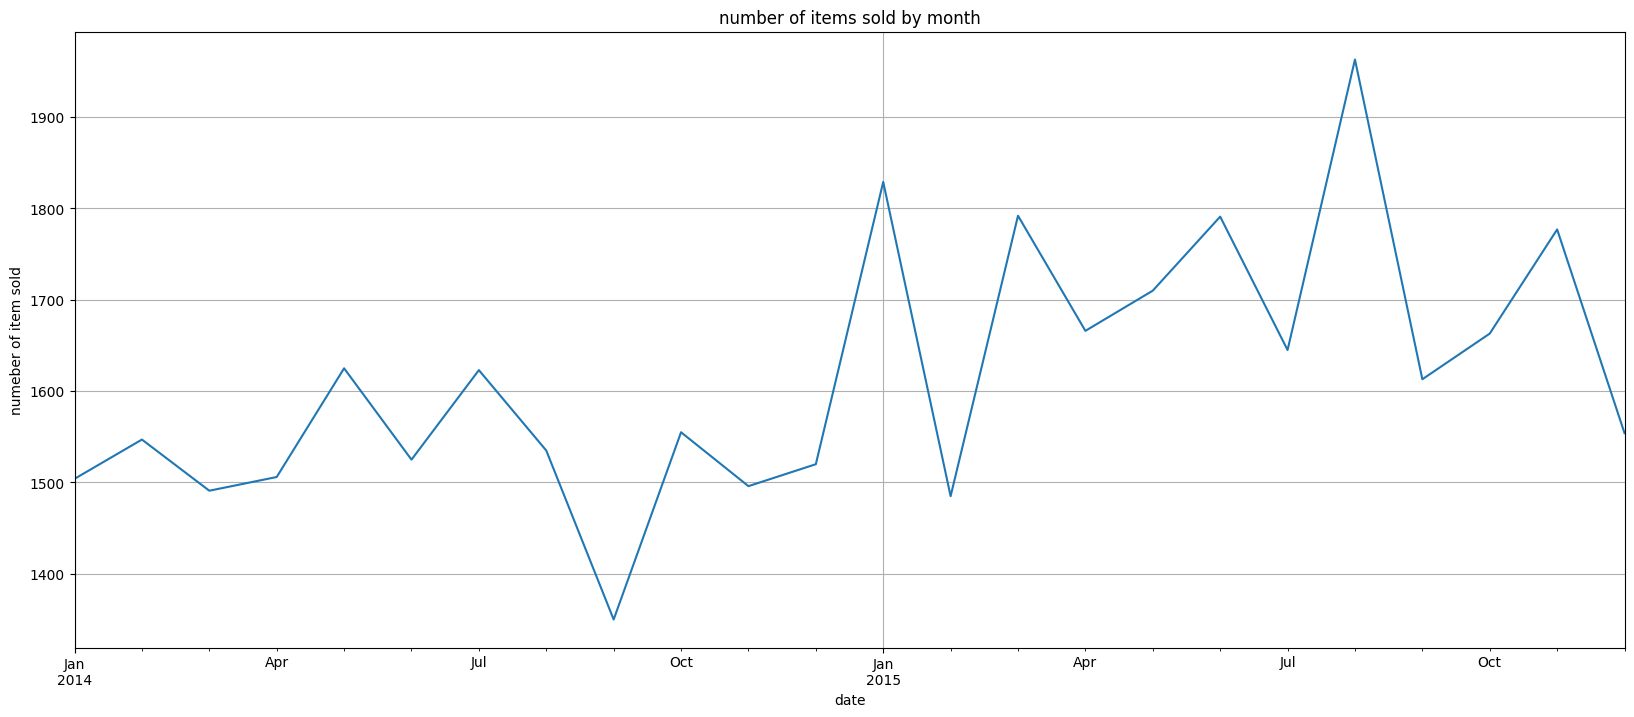

In [ ]:
df_date.resample("M")["itemDescription"].count().plot(figsize =(20,8), grid = True, title= 'number of items sold by month').set(xlabel="date", ylabel="numeber of item sold")

In [ ]:
cust_level = df[["Member_number","itemDescription"]].sort_values(by="Member_number", ascending= False)
cust_level["itemDescription"] = cust_level["itemDescription"].str.strip()
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [ ]:
transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(["Member_number"]))]

<ipython-input-13-de37ffb8f6e8>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(["Member_number"]))]


In [ ]:
from apyori import apriori

In [ ]:
rules = apriori(transactions = transactions, min_support = 0.002, min_confidence=0.05, min_lift=3, min_length=2)

In [16]:
results = list(rules)

In [18]:
results

[RelationRecord(items=frozenset({'UHT-milk', 'kitchen towels'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'beef', 'potato products'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'canned fruit', 'coffee'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'domestic eggs', 'meat spreads'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [19]:
def inspect(results):
  lhs = [tuple(result[2][0][0])[0] for result in results]
  rhs = [tuple(result[2][0][1])[0] for result in results]
  supports = [result[1] for result in results]
  confidences = [result[2][0][2] for result in results]
  lifts = [result[2][0][3] for result in results]
  return list(zip(lhs,rhs,supports,confidences,lifts))

resultsindataframe = pd.DataFrame(inspect(results),columns=['Left Hand Side','Right Hand Side','Support','Confidences','Lifts'])



In [20]:
resultsindataframe.nlargest(n=10, columns= 'Lifts')

,Left Hand Side,Right Hand Side,Support,Confidences,Lifts
4915,bottled water,pork,0.002052,0.105263,14.654135
4914,bottled water,pork,0.002052,0.105263,12.068111
2674,beef,pork,0.002052,0.242424,11.524021
3573,citrus fruit,specialty chocolate,0.002052,0.073394,11.443670
4133,citrus fruit,whole milk,0.002052,0.148148,11.105413
3290,bottled water,soda,0.002052,0.150943,10.322410
2904,bottled beer,rolls/buns,0.002309,0.097826,9.533152
5045,bottled water,whole milk,0.002052,0.135593,9.438257
2902,bottled beer,domestic eggs,0.002052,0.086957,9.415459
2734,bottled water,shopping bags,0.002309,0.118421,9.232105


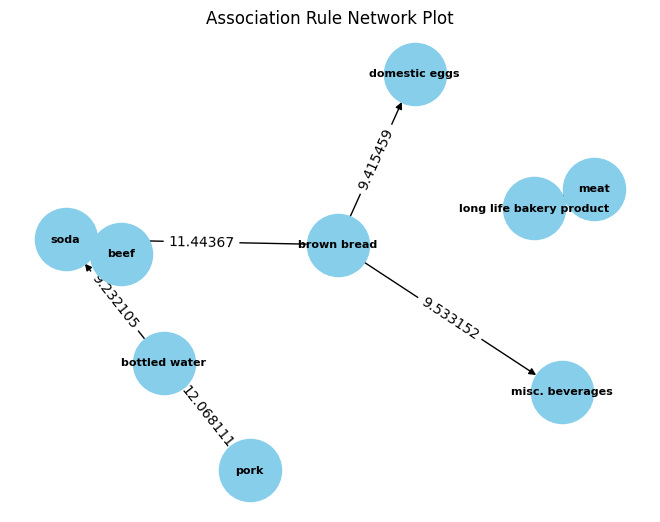

In [25]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the provided data
data = {
    'Left Hand Side': ['bottled water', 'bottled water', 'beef', 'brown bread', 'long life bakery product', 'bottled water', 'brown bread', 'bottled water', 'brown bread', 'bottled water'],
    'Right Hand Side': ['pork', 'pork', 'soda', 'soda', 'meat', 'soda', 'misc. beverages', 'soda', 'domestic eggs', 'soda'],
    'Support': [0.002052, 0.002052, 0.002052, 0.002052, 0.002052, 0.002052, 0.002309, 0.002052, 0.002052, 0.002309],
    'Confidence': [0.105263, 0.105263, 0.242424, 0.073394, 0.148148, 0.150943, 0.097826, 0.135593, 0.086957, 0.118421],
    'Lift': [14.654135, 12.068111, 11.524021, 11.443670, 11.105413, 10.322410, 9.533152, 9.438257, 9.415459, 9.232105]
}

df = pd.DataFrame(data)

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for index, row in df.iterrows():
    G.add_node(row['Left Hand Side'])
    G.add_node(row['Right Hand Side'])
    G.add_edge(row['Left Hand Side'], row['Right Hand Side'], weight=row['Lift'])

# Plot the graph
pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=2000, node_color='skyblue', font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Association Rule Network Plot')
plt.show()


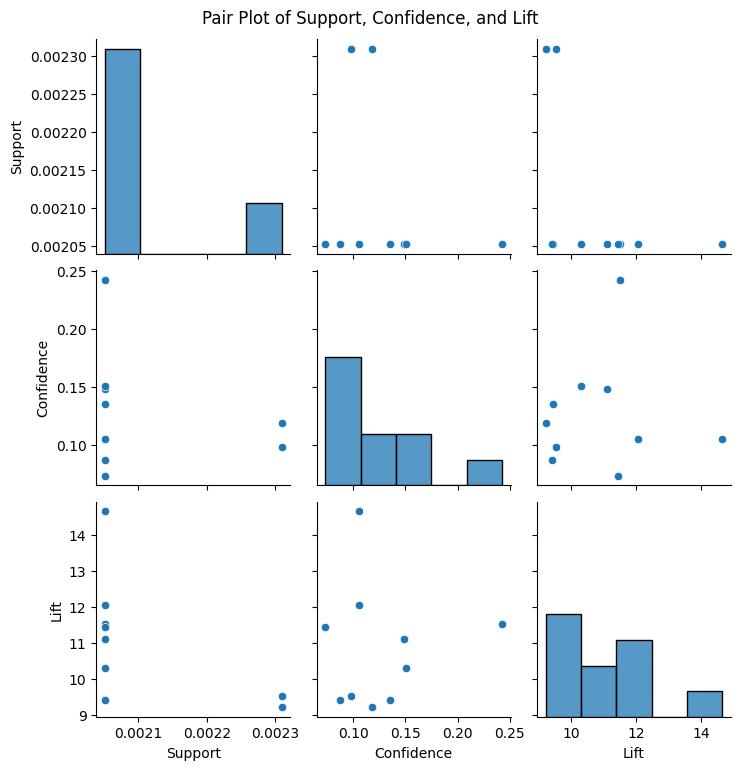

In [27]:
sns.pairplot(df[['Support', 'Confidence', 'Lift']])
plt.suptitle('Pair Plot of Support, Confidence, and Lift', y=1.02)
plt.show()
